In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [232]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [233]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
df.shape

(891, 12)

In [235]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [237]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# we can find both categorical and contineous data present in dataset
# here survived is the target variable only two variables (0,1).target variable is categorical so its classification ML model

In [238]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [239]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# we can see that count of all columns not same,null values present in age ,cabin and embark columns
# in cabin column null valuse are 687 out of 891 so we can delete this column
# in age column we can fill with mean value and embark column with mode 
# fare min is 0 ,that is not possible so will replace with mean
# in age and fare column huge deference between q3 and max ,we can assume that outliers are present 
# in fare column mean is greater that median means data is right  skewed

In [240]:
df=df.drop('Cabin',axis=1)

In [241]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [242]:
df['Fare']=df['Fare'].replace(0,df['Fare'].mean())

In [243]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [244]:
# checking value counts in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000     

In [245]:
# checking categorical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical column ',categorical_col)
print('\n')
# contineous column
contineous_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        contineous_col.append(i)
print('contineous  column ',contineous_col)
print('\n')

categorical column  ['Name', 'Sex', 'Ticket', 'Embarked']


contineous  column  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




In [246]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [65]:
# passenger id is a unique no so we can delete the column
# df.drop('PassengerId',axis=1,inplace=True)

In [247]:
# now null values are filled with mean and mode values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.746366
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.514272
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,15.100000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,32.204208
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# no null values ,negative values and invalid no present in dataset
# same no of values present in each columns
#

0    549
1    342
Name: Survived, dtype: int64


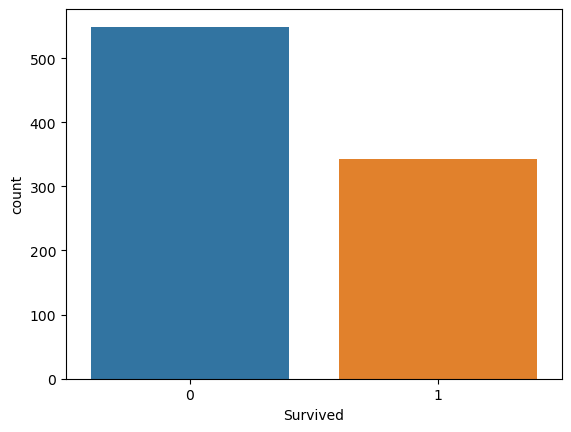

In [248]:
# lets visualise target data to check imbalance
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

In [ ]:
# here we can find not survived count no is greater than survived count slightly imbalance issue found

male      577
female    314
Name: Sex, dtype: int64


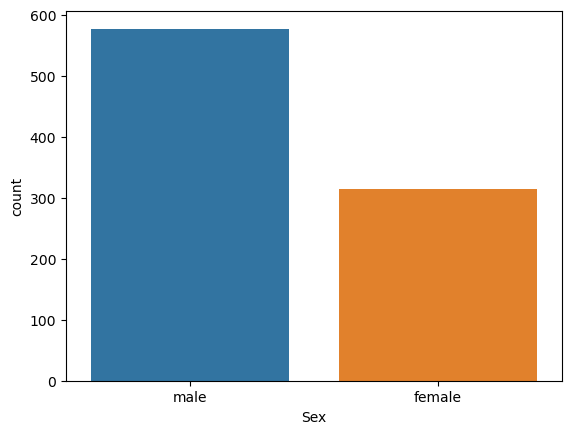

In [46]:
# visualise the count of gender
sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


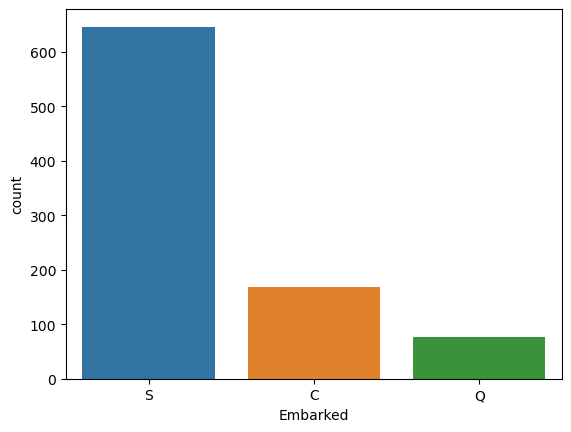

In [48]:
# visualise the count of embarked
sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts())
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


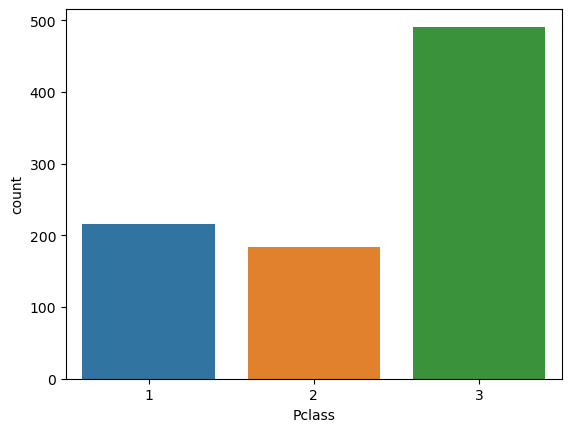

In [68]:
# visualise the count of embarked
sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())
plt.show()

In [ ]:
# pclass 3 value count is  greater than pclass 1 and 2

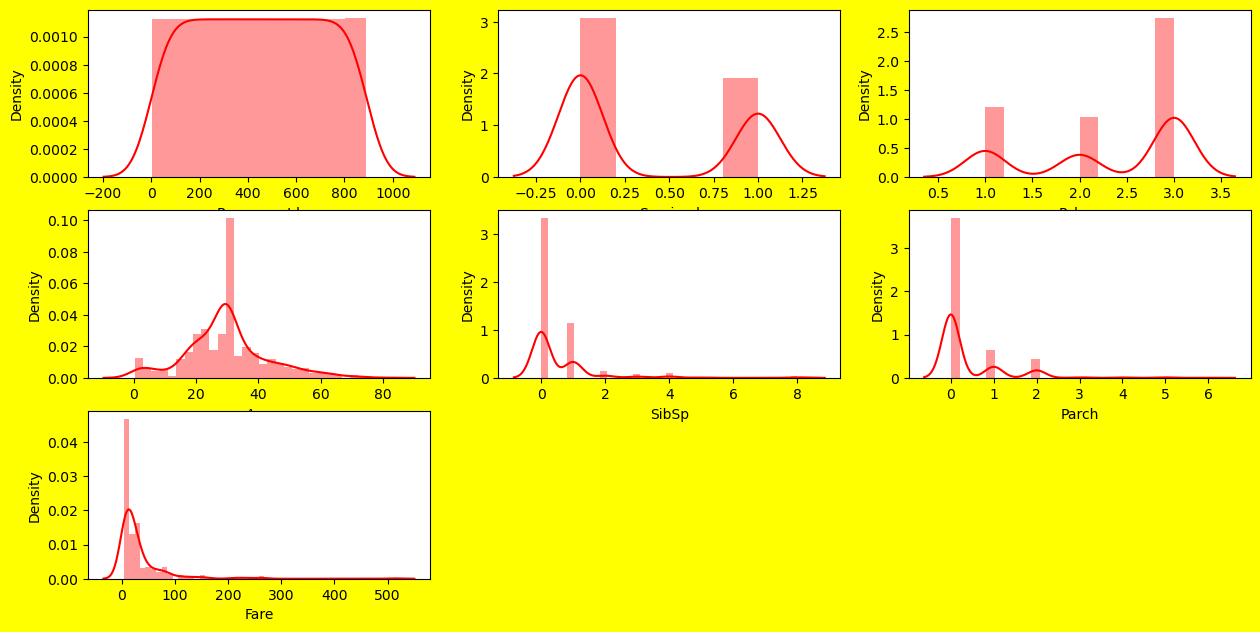

In [249]:
# lets check distribution of data 
plt.figure(figsize=(15,10),facecolor='yellow')
p=1
for column in contineous_col:
    if p<12:
        plt.subplot(4,3,p)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=10)
    p+=1
plt.show()

In [ ]:
# all columns almost normally distributed but fare colum we can see slight left skewed 

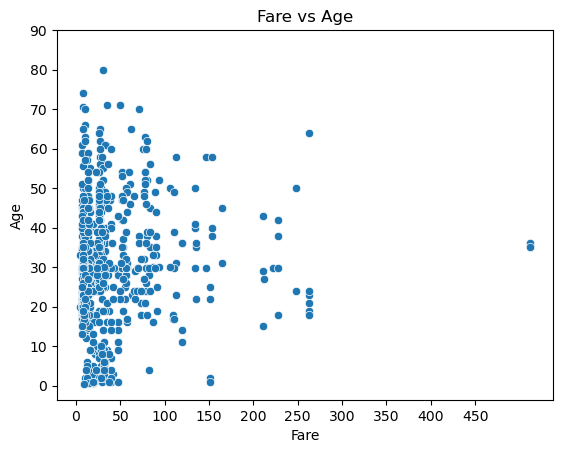

In [250]:
# lets check age and fare 
sns.scatterplot(x='Fare',y='Age',data=df)
plt.title('Fare vs Age')
plt.yticks(range(0,100,10))
plt.xticks(range(0,500,50))

plt.show()

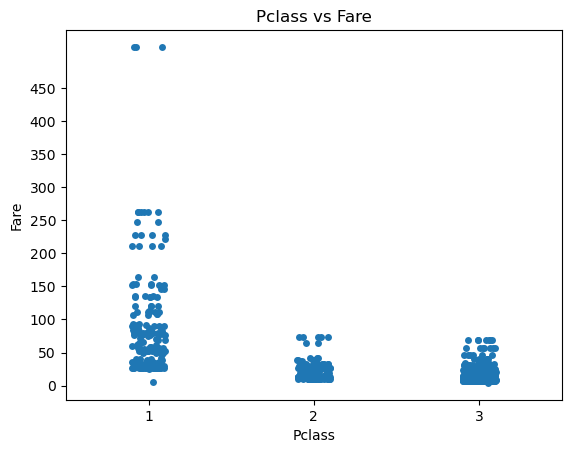

In [251]:
# lets check pclass and fare 
sns.stripplot(x='Pclass',y='Fare',data=df)
plt.title('Pclass vs Fare')

plt.yticks(range(0,500,50))

plt.show()

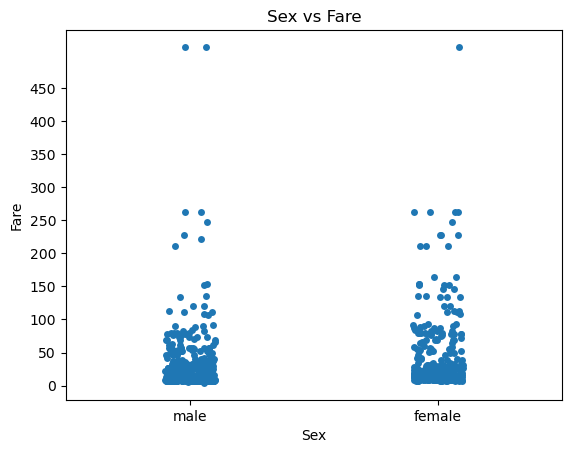

In [252]:
# # lets check sex and fare 
sns.stripplot(x='Sex',y='Fare',data=df)
plt.title('Sex vs Fare')

plt.yticks(range(0,500,50))

plt.show()

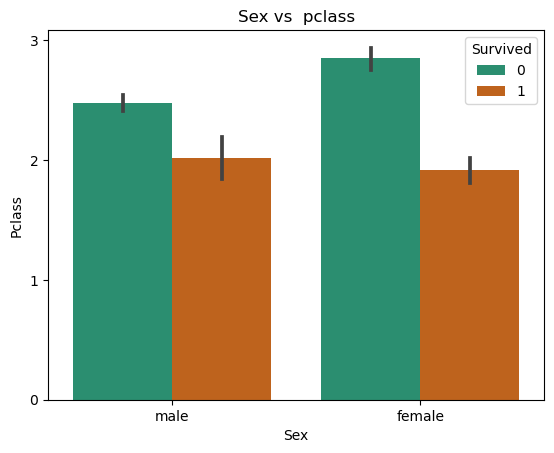

In [172]:
# compare sex  and pclass on survived
sns.barplot(x='Sex',y='Pclass',hue='Survived',data=df,palette='Dark2')
plt.yticks(range(0,4,1))
plt.title('Sex vs  pclass')
plt.show()

In [ ]:
# from chart we can see that more female passengers not survived compared to male and slightly more male passengers are survived compared to female passengers

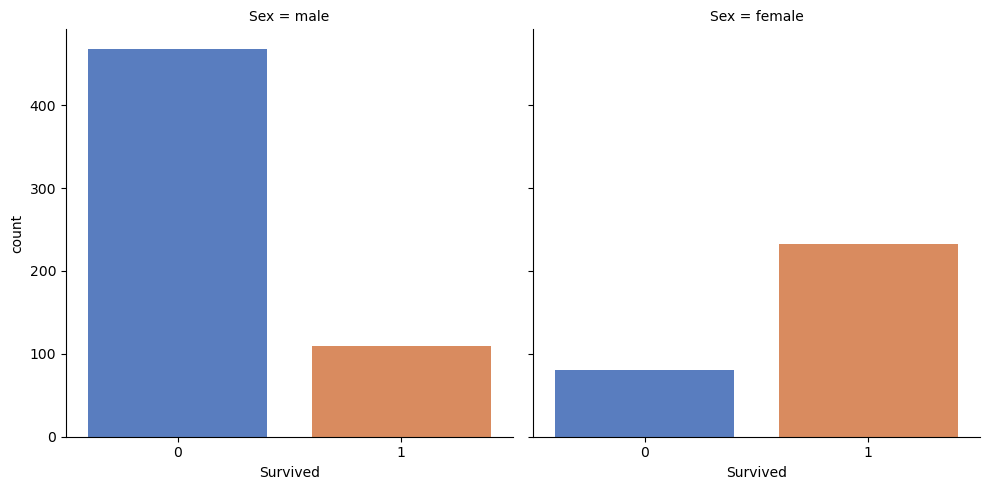

In [253]:
# check survived status with 
sns.catplot(x='Survived',col='Sex',data=df,kind='count',palette='muted')

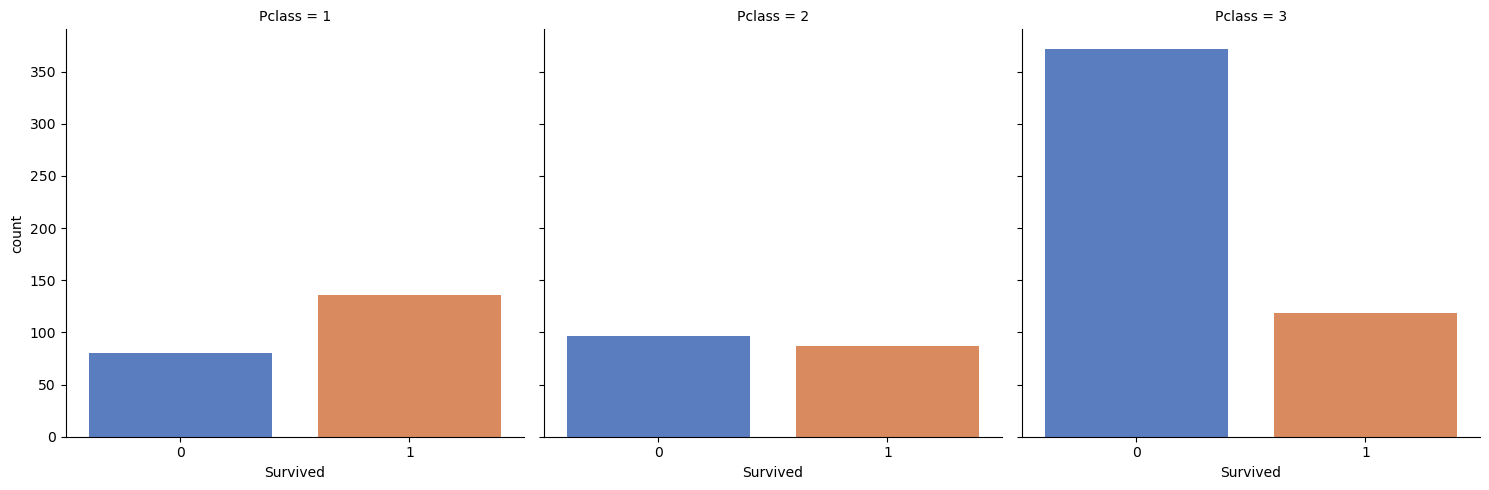

In [254]:
sns.catplot(x='Survived',col='Pclass',data=df,kind='count',palette='muted')
plt.show()

In [ ]:
# pclass 3 passenger not survived count is higher than  pclass 1 and 2

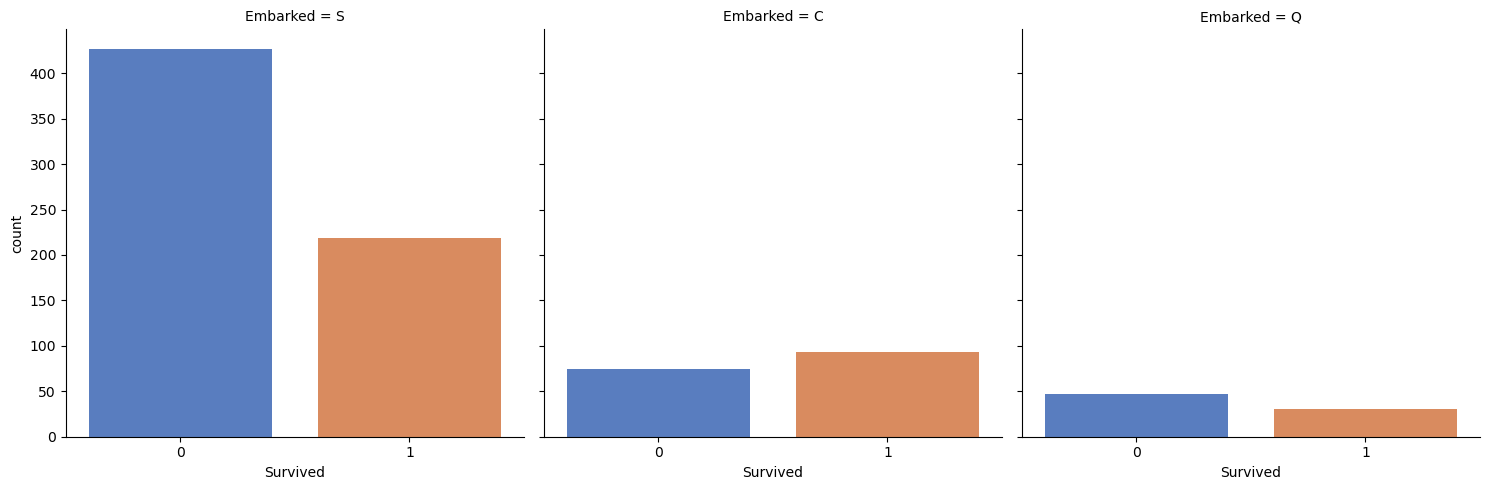

In [255]:
sns.catplot(x='Survived',col='Embarked',data=df,kind='count',palette='muted')
plt.show()


In [ ]:
# embarked S survived and not survived count is higher compared to Embarked 'C' and 'Q'

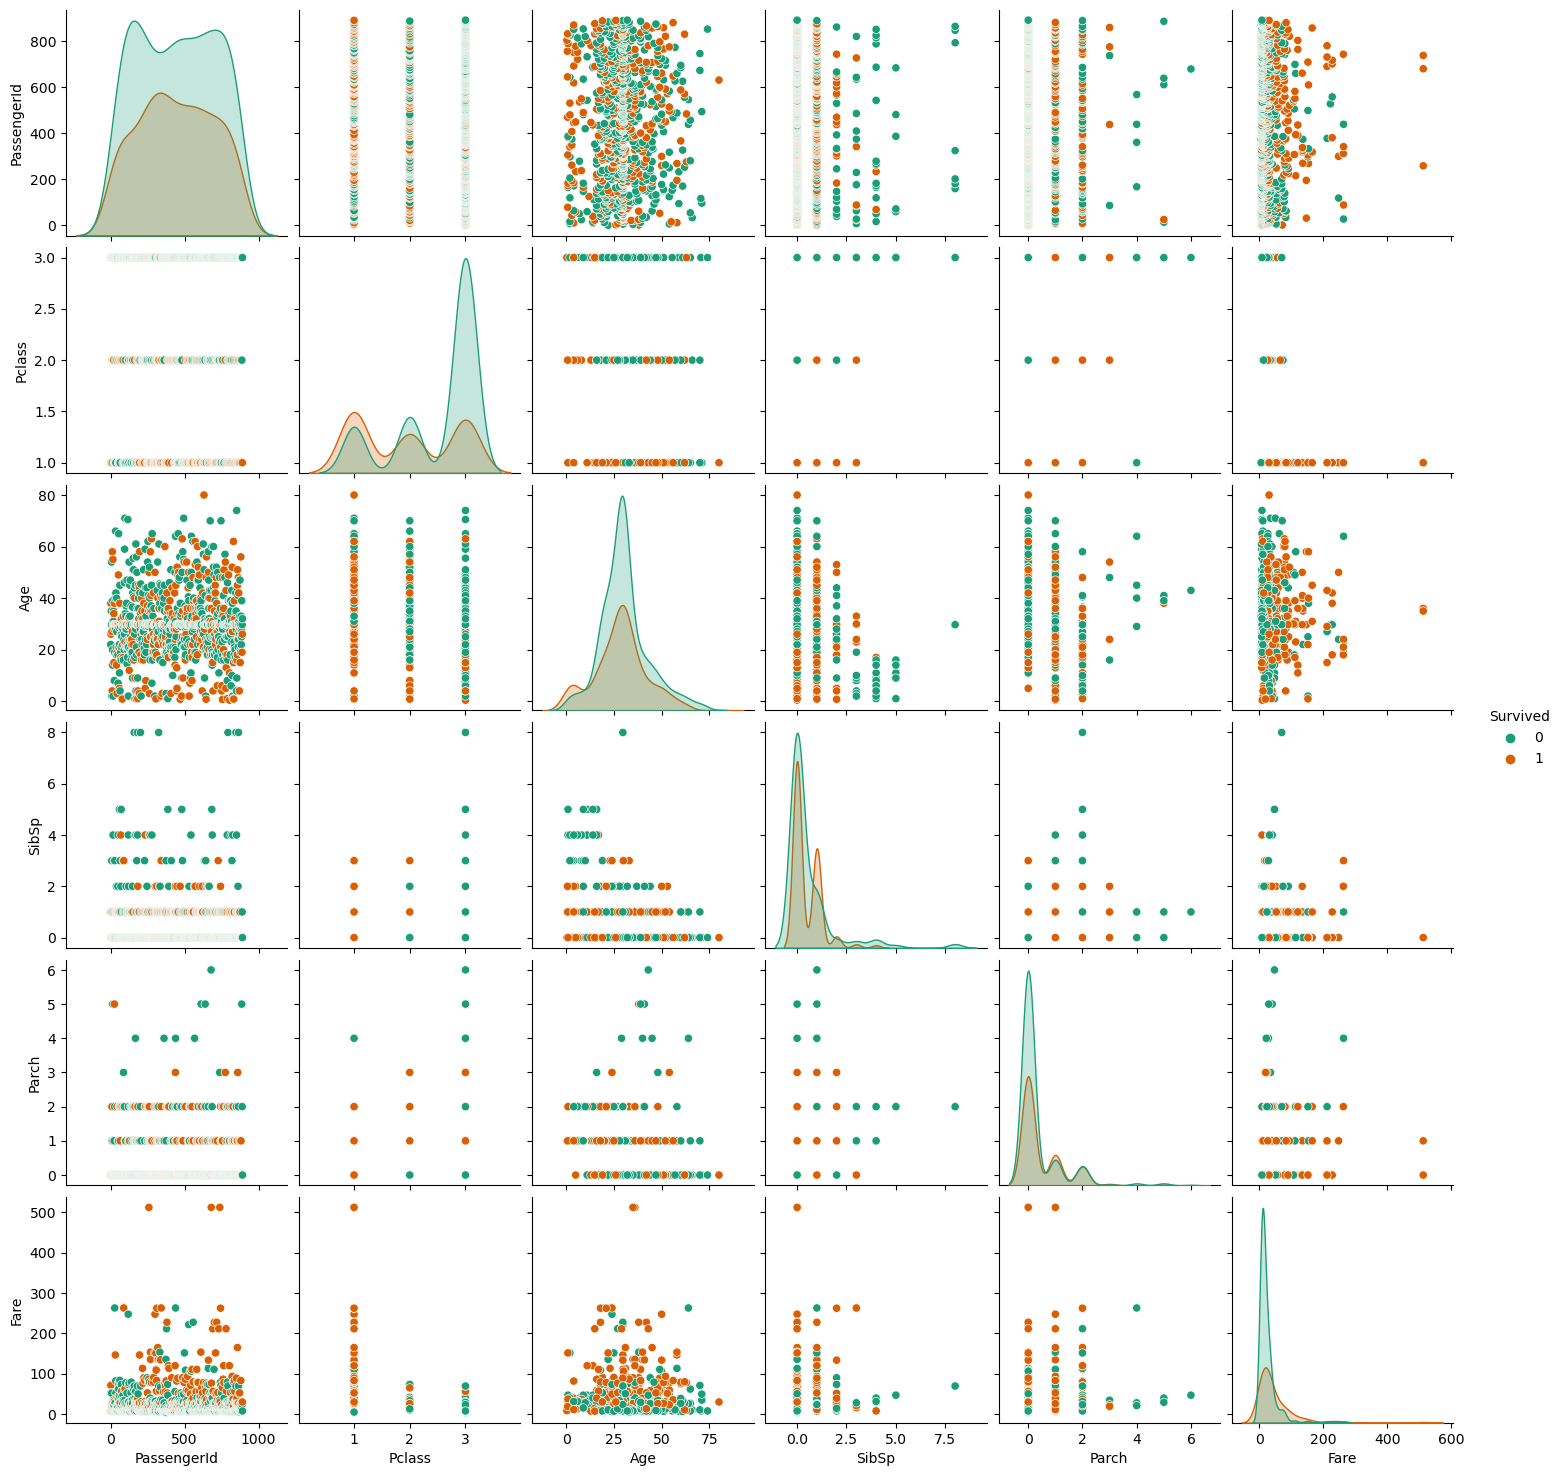

In [256]:
sns.pairplot(df,hue='Survived',palette='Dark2')
plt.show()

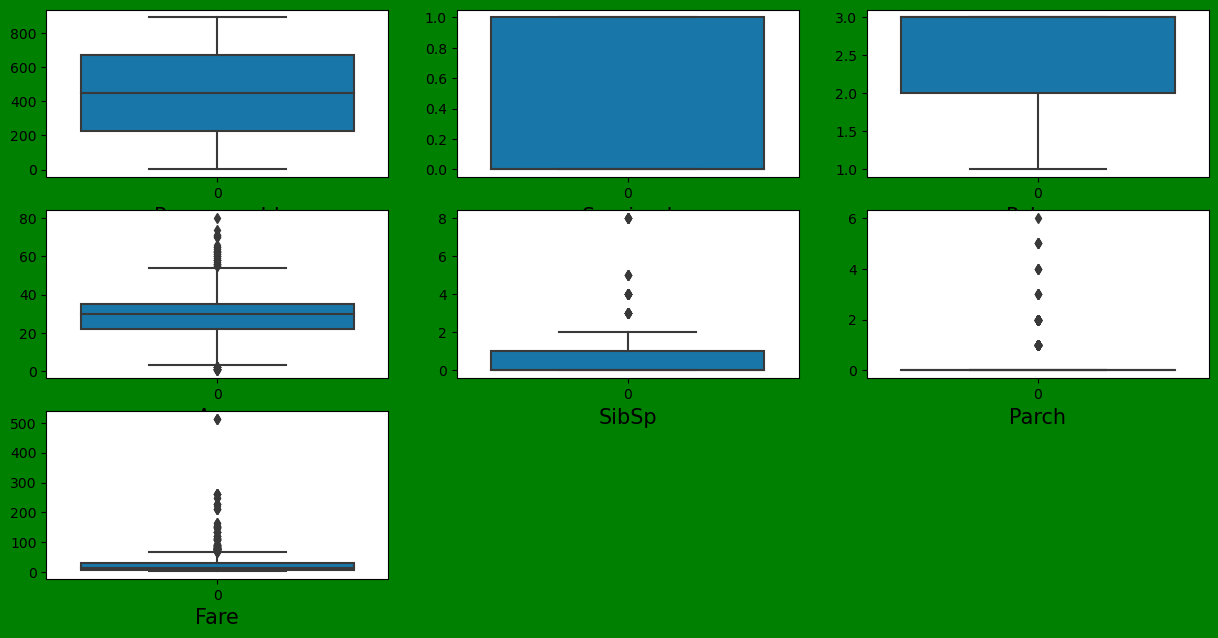

In [257]:
# check outliers using boxplot
plt.figure(figsize=(15,10),facecolor='g')
p=1
for column in contineous_col:
    if p<12:
        plt.subplot(4,3,p)
        sns.boxplot(df[column],palette='winter_r')
        plt.xlabel(column,fontsize=15)
    p+=1
plt.show()

In [258]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.811194
dtype: float64

In [259]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


In [260]:
df['Tittle']=df['Name'].str.extract('([A-Za-z]+)\.',expand =False)
print(df['Tittle'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Tittle, dtype: int64


In [261]:
tittle_mapping={
    'Mr':0,
    'Miss':1,
    'Mrs':2,
    'Master':3,
    'Dr':4,
    'Rev':5,
    'Mlle':6,
    'Major':7,
    'Col':8,
    'Countess':9,
    'Capt':10,
    'Ms':11,
    'Sir':12,
    'Lady':13,
    'Mme':14,
    'Don':15,
    'Jonkheer':16
}
df['Tittle']=df['Tittle'].map(tittle_mapping)

In [262]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


KeyError: "['Title'] not found in axis"

In [264]:
df.drop('Name',axis=1,inplace=True)


In [265]:
df['Ticketprefix']=df['Ticket'].apply(lambda x: x.split()[0] if len(x.split())>1 else 'None')

In [266]:
print(df['Ticketprefix'].value_counts())

None          665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: Ticketprefix, dtype: int64


In [267]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=le.fit_transform(df['Ticketprefix'])
df['Ticketprefix']=df1

In [268]:
df['Ticketnumber']=df['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, x)))

In [269]:
print(df['Ticketnumber'].value_counts())

2343       7
347082     7
1601       7
3101295    6
2144       6
          ..
9234       1
19988      1
2693       1
17612      1
370376     1
Name: Ticketnumber, Length: 679, dtype: int64


In [270]:
le_enc=LabelEncoder()
df2=le_enc.fit_transform(df['Ticketnumber'])
df['Ticketnumber']=df2

In [271]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle,Ticketprefix,Ticketnumber
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,4,630
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,2,18,124
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,37,188
3,4,1,1,female,35.0,1,0,113803,53.1000,S,2,16,50
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,16,586


In [272]:
df['Ticketfrequency']=df.groupby('Ticket')['Ticket'].transform('count')

In [273]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle,Ticketprefix,Ticketnumber,Ticketfrequency
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,4,630,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,2,18,124,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,37,188,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,2,16,50,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,16,586,1


In [274]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Tittle             0
Ticketprefix       0
Ticketnumber       0
Ticketfrequency    0
dtype: int64

In [275]:
df.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Ticket              object
Fare               float64
Embarked            object
Tittle               int64
Ticketprefix         int32
Ticketnumber         int32
Ticketfrequency      int64
dtype: object

In [276]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle,Ticketprefix,Ticketnumber,Ticketfrequency
0,1,0,3,1.0,22.000000,1,0,523.0,7.2500,2.0,0,4,630,1
1,2,1,1,0.0,38.000000,1,0,596.0,71.2833,0.0,2,18,124,1
2,3,1,3,0.0,26.000000,0,0,669.0,7.9250,2.0,1,37,188,1
3,4,1,1,0.0,35.000000,1,0,49.0,53.1000,2.0,2,16,50,2
4,5,0,3,1.0,35.000000,0,0,472.0,8.0500,2.0,0,16,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.000000,0,0,101.0,13.0000,2.0,5,16,156,1
887,888,1,1,0.0,19.000000,0,0,14.0,30.0000,2.0,1,16,15,1
888,889,0,3,0.0,29.699118,1,2,675.0,23.4500,2.0,1,39,657,2
889,890,1,1,1.0,26.000000,0,0,8.0,30.0000,0.0,0,16,9,1


In [277]:
df.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Sex                float64
Age                float64
SibSp                int64
Parch                int64
Ticket             float64
Fare               float64
Embarked           float64
Tittle               int64
Ticketprefix         int32
Ticketnumber         int32
Ticketfrequency      int64
dtype: object

In [278]:
print(df['Ticket'].value_counts())

333.0    7
568.0    7
80.0     7
249.0    6
566.0    6
        ..
513.0    1
98.0     1
212.0    1
606.0    1
466.0    1
Name: Ticket, Length: 681, dtype: int64


In [279]:
# passenger id is unique identification no so we can delete that column
df.drop('PassengerId',axis=1,inplace=True)

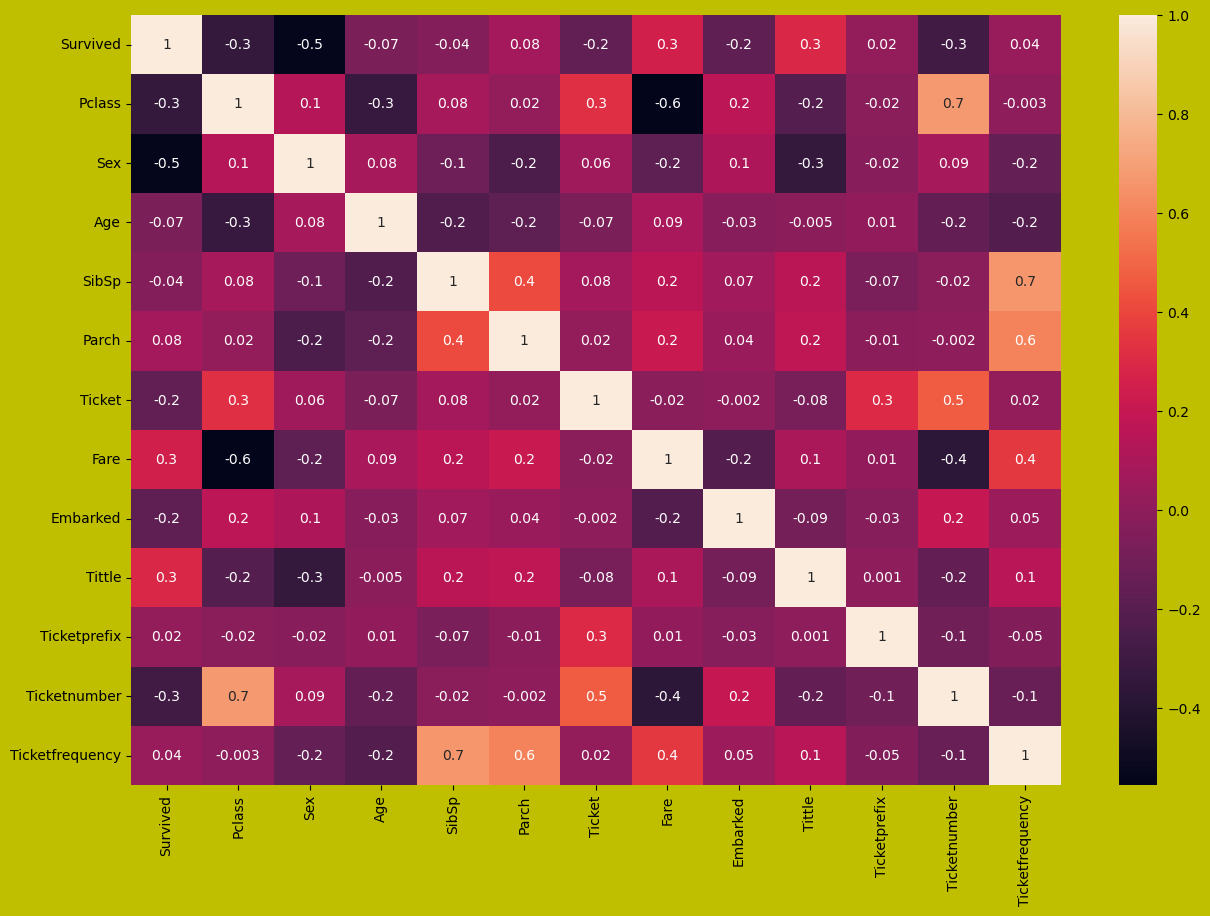

In [280]:
# checking corelation between feature and target
plt.figure(figsize=(15,10),facecolor='y')
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

In [281]:
# we can see that features like ticket frequency and sibsp  have corelation ,ticketfrequency and patch also have corelation
df.skew()

Survived           0.478523
Pclass            -0.630548
Sex               -0.618921
Age                0.434488
SibSp              3.695352
Parch              2.749117
Ticket             0.000246
Fare               4.811194
Embarked          -1.264823
Tittle             4.606730
Ticketprefix       1.868507
Ticketnumber       0.105023
Ticketfrequency    2.220638
dtype: float64

In [284]:
df['Fare']=np.cbrt(df['Fare'])

In [285]:
df.skew()

Survived           0.478523
Pclass            -0.630548
Sex               -0.618921
Age                0.434488
SibSp              3.695352
Parch              2.749117
Ticket             0.000246
Fare               1.096069
Embarked          -1.264823
Tittle             4.606730
Ticketprefix       1.868507
Ticketnumber       0.105023
Ticketfrequency    2.220638
dtype: float64

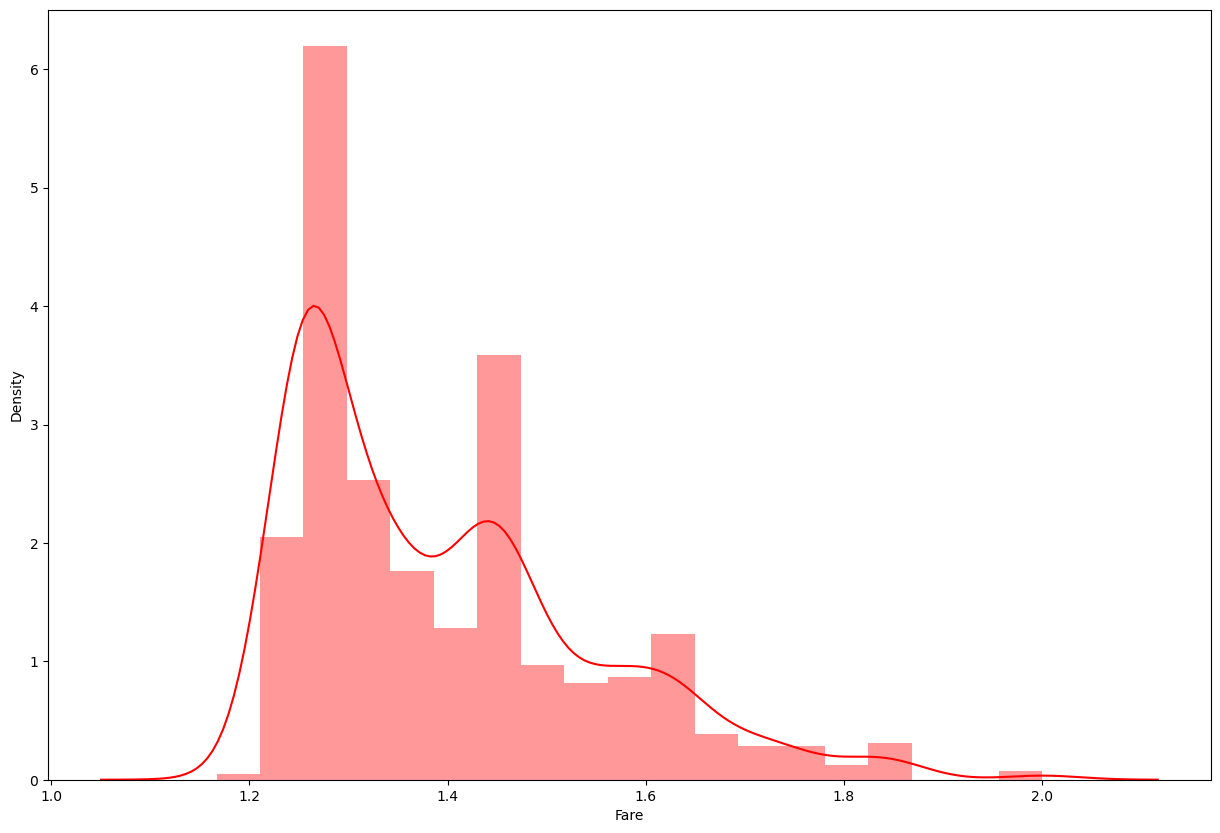

In [286]:
plt.figure(figsize=(15,10))
sns.distplot(df['Fare'],color='r')
plt.xlabel('Fare',fontsize=10)
plt.show()

In [288]:
from scipy.stats import zscore
outliers=df[['Fare','Age']]
z=np.abs(zscore(outliers))
z

,Fare,Age
0,0.990403,0.592481
1,1.393618,0.638789
2,0.908438,0.284663
3,1.051437,0.407926
4,0.893945,0.407926
...,...,...
886,0.437659,0.207709
887,0.419045,0.823344
888,0.158371,0.000000
889,0.419045,0.284663


In [289]:
np.where (z>3)

(array([ 27,  88,  96, 116, 258, 311, 341, 438, 493, 630, 672, 679, 737,
        742, 745, 851], dtype=int64),
 array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64))

In [290]:
df1=df[(z<3).all(axis=1)]

In [291]:
df1.shape

(875, 13)

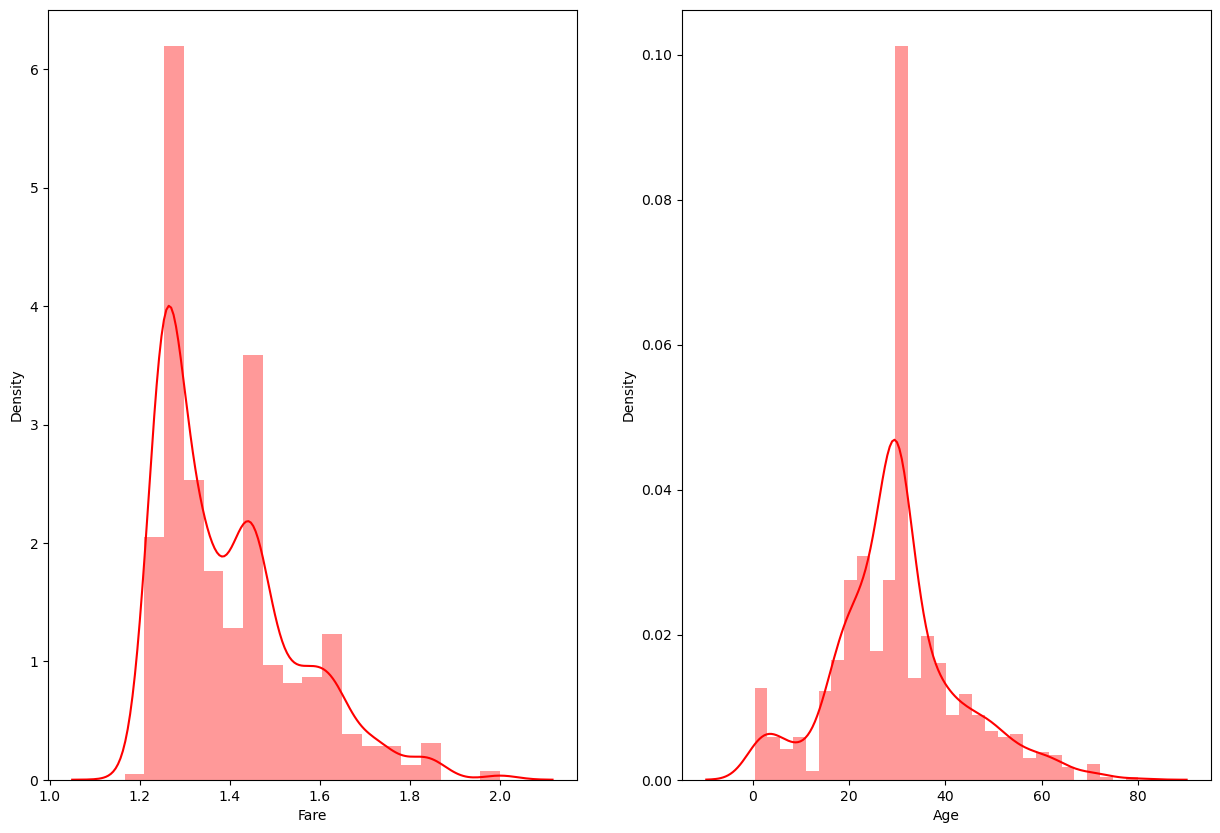

In [293]:
plt.figure(figsize=(15,10))
p=1
for col in df[['Fare','Age']]:
    if p<3:
        plt.subplot(1,2,p)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [294]:
df1.skew()

Survived           0.487802
Pclass            -0.670726
Sex               -0.615589
Age                0.236634
SibSp              3.773511
Parch              2.822112
Ticket             0.006900
Fare               0.943176
Embarked          -1.293468
Tittle             4.635731
Ticketprefix       1.840074
Ticketnumber       0.084236
Ticketfrequency    2.258197
dtype: float64

In [297]:
df1['Fare']=np.cbrt(df['Fare'])

In [301]:
df1['Fare']=np.log1p(df['Fare'])

In [302]:
df1.skew()

Survived           0.487802
Pclass            -0.670726
Sex               -0.615589
Age                0.236634
SibSp              3.773511
Parch              2.822112
Ticket             0.006900
Fare               0.781587
Embarked          -1.293468
Tittle             4.635731
Ticketprefix       1.840074
Ticketnumber       0.084236
Ticketfrequency    2.258197
dtype: float64

In [310]:

# split data into features and target
x=df1.drop('Survived',axis=1,)
y=df1['Survived']

In [311]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [312]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle,Ticketprefix,Ticketnumber,Ticketfrequency
0,0.813902,0.738875,-0.589789,0.440980,-0.467034,0.930852,-1.055590,0.579559,-0.535070,-2.209159,1.534850,-0.571812
1,-1.604314,-1.353409,0.694272,0.440980,-0.467034,1.295987,1.512394,-1.968755,0.735448,0.202372,-1.023936,-0.571812
2,0.813902,-1.353409,-0.268774,-0.469061,-0.467034,1.661122,-0.956276,0.579559,0.100189,3.475164,-0.700295,-0.571812
3,-1.604314,-1.353409,0.453511,0.440980,-0.467034,-1.440023,1.179503,0.579559,0.735448,-0.142133,-1.398146,0.162895
4,0.813902,0.738875,0.453511,-0.469061,-0.467034,0.675758,-0.938811,0.579559,-0.535070,-0.142133,1.312347,-0.571812
...,...,...,...,...,...,...,...,...,...,...,...,...
870,-0.395206,0.738875,-0.188520,-0.469061,-0.467034,-1.179927,-0.403053,0.579559,2.641225,-0.142133,-0.862116,-0.571812
871,-1.604314,-1.353409,-0.830550,-0.469061,-0.467034,-1.615088,0.535721,0.579559,0.100189,-0.142133,-1.575137,-0.571812
872,0.813902,-1.353409,0.028095,0.440980,2.055528,1.691133,0.258679,0.579559,0.100189,3.819668,1.671386,0.162895
873,-1.604314,0.738875,-0.268774,-0.469061,-0.467034,-1.645099,0.535721,-1.968755,-0.535070,-0.142133,-1.605479,-0.571812


In [313]:
# checking multicolinearity with vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [314]:
vif

,vif values,features
0,6.558749,Pclass
1,1.238289,Sex
2,1.213722,Age
3,1.879145,SibSp
4,1.646243,Parch
5,1.634948,Ticket
6,7.179750,Fare
7,1.113666,Embarked
8,1.223835,Tittle
9,1.259615,Ticketprefix


In [ ]:
# no multicolinearity issue found in features 


In [315]:
y.value_counts()

0    541
1    334
Name: Survived, dtype: int64

In [316]:
# not survived value count is higher compared to survived value count
# balance the data using oversampling technique
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [317]:
y1.value_counts()

0    541
1    541
Name: Survived, dtype: int64

In [318]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxACC=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('Accuracy score ',maxACC,'on Random state ',maxRS)
    

Accuracy score  0.9015384615384615 on Random state  116


In [319]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [320]:
# train test split
# randomforest
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,rfr_pred))
print('Confusion matrix \n',confusion_matrix(y_test,rfr_pred))
print('\n classification report \n',classification_report(y_test,rfr_pred))

Accuracy score  0.8250950570342205
Confusion matrix 
 [[138  21]
 [ 25  79]]

 classification report 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       159
           1       0.79      0.76      0.77       104

    accuracy                           0.83       263
   macro avg       0.82      0.81      0.82       263
weighted avg       0.82      0.83      0.82       263



In [321]:
# Logisticregression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,lr_pred))
print('Confusion matrix \n',confusion_matrix(y_test,lr_pred))
print('\n classification report \n',classification_report(y_test,lr_pred))

Accuracy score  0.7870722433460076
Confusion matrix 
 [[133  26]
 [ 30  74]]

 classification report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       159
           1       0.74      0.71      0.73       104

    accuracy                           0.79       263
   macro avg       0.78      0.77      0.78       263
weighted avg       0.79      0.79      0.79       263



In [332]:
# DecisionTreeclassifier
from sklearn.tree  import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,dt_pred))
print('Confusion matrix \n',confusion_matrix(y_test,dt_pred))
print('\n classification report \n',classification_report(y_test,dt_pred))

Accuracy score  0.752851711026616
Confusion matrix 
 [[130  29]
 [ 36  68]]

 classification report 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       159
           1       0.70      0.65      0.68       104

    accuracy                           0.75       263
   macro avg       0.74      0.74      0.74       263
weighted avg       0.75      0.75      0.75       263



In [334]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,knn_pred))
print('Confusion matrix \n',confusion_matrix(y_test,knn_pred))
print('\n classification report \n',classification_report(y_test,knn_pred))

Accuracy score  0.8136882129277566
Confusion matrix 
 [[137  22]
 [ 27  77]]

 classification report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       159
           1       0.78      0.74      0.76       104

    accuracy                           0.81       263
   macro avg       0.81      0.80      0.80       263
weighted avg       0.81      0.81      0.81       263



In [322]:
# SVC
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,svm_pred))
print('Confusion matrix \n',confusion_matrix(y_test,svm_pred))
print('\n classification report \n',classification_report(y_test,svm_pred))


Accuracy score  0.8212927756653993
Confusion matrix 
 [[141  18]
 [ 29  75]]

 classification report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       159
           1       0.81      0.72      0.76       104

    accuracy                           0.82       263
   macro avg       0.82      0.80      0.81       263
weighted avg       0.82      0.82      0.82       263



In [323]:
# Gradientboostingclassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,gbc_pred))
print('Confusion matrix \n',confusion_matrix(y_test,gbc_pred))
print('\n classification report \n',classification_report(y_test,gbc_pred))

Accuracy score  0.8403041825095057
Confusion matrix 
 [[141  18]
 [ 24  80]]

 classification report 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       159
           1       0.82      0.77      0.79       104

    accuracy                           0.84       263
   macro avg       0.84      0.83      0.83       263
weighted avg       0.84      0.84      0.84       263



In [324]:
# Adaboostclassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,abc_pred))
print('Confusion matrix \n',confusion_matrix(y_test,abc_pred))
print('\n classification report \n',classification_report(y_test,abc_pred))

Accuracy score  0.8288973384030418
Confusion matrix 
 [[135  24]
 [ 21  83]]

 classification report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       159
           1       0.78      0.80      0.79       104

    accuracy                           0.83       263
   macro avg       0.82      0.82      0.82       263
weighted avg       0.83      0.83      0.83       263



In [325]:
# Baggingclassifier
bagg=BaggingClassifier()
bagg.fit(x_train,y_train)
bagg_pred=bagg.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,bagg_pred))
print('Confusion matrix \n',confusion_matrix(y_test,bagg_pred))
print('\n classification report \n',classification_report(y_test,bagg_pred))

Accuracy score  0.8022813688212928
Confusion matrix 
 [[140  19]
 [ 33  71]]

 classification report 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       159
           1       0.79      0.68      0.73       104

    accuracy                           0.80       263
   macro avg       0.80      0.78      0.79       263
weighted avg       0.80      0.80      0.80       263



In [326]:
# Extratresclassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred=etc.predict(x_test)
print('Accuracy score ',accuracy_score(y_test,etc_pred))
print('Confusion matrix \n',confusion_matrix(y_test,etc_pred))
print('\n classification report \n',classification_report(y_test,etc_pred))

Accuracy score  0.7984790874524715
Confusion matrix 
 [[134  25]
 [ 28  76]]

 classification report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       159
           1       0.75      0.73      0.74       104

    accuracy                           0.80       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.80      0.80      0.80       263



In [328]:
# cross validation score with randomforest
from sklearn.model_selection import cross_val_score
valid_score=cross_val_score(rfr,x1,y1)
print('Accuracy score ',accuracy_score(y_test,rfr_pred))
print(valid_score)
print(valid_score.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,rfr_pred)-valid_score.mean())


Accuracy score  0.8250950570342205
[0.78801843 0.83410138 0.86574074 0.89351852 0.88425926]
0.8531276668373442
Deference beween accuracy score and validation score -0.02803260980312372


In [329]:
# cross validation score with logisticregression
valid_score1=cross_val_score(lr,x1,y1)
print('Accuracy score ',accuracy_score(y_test,lr_pred))
print(valid_score1)
print(valid_score1.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,lr_pred)-valid_score1.mean())


Accuracy score  0.7870722433460076
[0.76497696 0.79723502 0.76388889 0.80555556 0.81018519]
0.78836832223929
Deference beween accuracy score and validation score -0.0012960788932824263


In [335]:
# cross validation score with DecisionTree
valid_score2=cross_val_score(dt,x1,y1)
print('Accuracy score ',accuracy_score(y_test,dt_pred))
print(valid_score2)
print(valid_score2.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,dt_pred)-valid_score2.mean())


Accuracy score  0.752851711026616
[0.73732719 0.76497696 0.8287037  0.85648148 0.86111111]
0.8097200887523467
Deference beween accuracy score and validation score -0.05686837772573072


In [336]:
# cross validation score with KNn
valid_score3=cross_val_score(knn,x1,y1)
print('Accuracy score ',accuracy_score(y_test,knn_pred))
print(valid_score3)
print(valid_score3.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,knn_pred)-valid_score3.mean())

Accuracy score  0.8136882129277566
[0.76497696 0.77880184 0.84722222 0.86574074 0.85648148]
0.8226446492575527
Deference beween accuracy score and validation score -0.008956436329796036


In [337]:
# cross validation score with SvC
valid_score4=cross_val_score(svm,x1,y1)
print('Accuracy score ',accuracy_score(y_test,svm_pred))
print(valid_score4)
print(valid_score4.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,svm_pred)-valid_score4.mean())

Accuracy score  0.8212927756653993
[0.77419355 0.83410138 0.81481481 0.88888889 0.83796296]
0.8299923195084485
Deference beween accuracy score and validation score -0.008699543843049273


In [338]:
# cross validation score with GradientBoosting
valid_score5=cross_val_score(gbc,x1,y1)
print('Accuracy score ',accuracy_score(y_test,gbc_pred))
print(valid_score5)
print(valid_score5.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,gbc_pred)-valid_score5.mean())

Accuracy score  0.8403041825095057
[0.77880184 0.83410138 0.85648148 0.87962963 0.86111111]
0.8420250896057346
Deference beween accuracy score and validation score -0.001720907096228963


In [339]:
# cross validation score with AdaBoost
valid_score6=cross_val_score(abc,x1,y1)
print('Accuracy score ',accuracy_score(y_test,abc_pred))
print(valid_score6)
print(valid_score6.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,abc_pred)-valid_score6.mean())

Accuracy score  0.8288973384030418
[0.76497696 0.8156682  0.84259259 0.875      0.85185185]
0.8300179211469534
Deference beween accuracy score and validation score -0.00112058274391158


In [340]:
# cross validation score with Baggingclassifier
valid_score7=cross_val_score(bagg,x1,y1)
print('Accuracy score ',accuracy_score(y_test,bagg_pred))
print(valid_score7)
print(valid_score7.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,bagg_pred)-valid_score7.mean())

Accuracy score  0.8022813688212928
[0.77419355 0.80645161 0.84722222 0.89351852 0.87962963]
0.8402031063321387
Deference beween accuracy score and validation score -0.03792173751084593


In [341]:
# cross validation score with ExtraTrreclassifier
valid_score8=cross_val_score(etc,x1,y1)
print('Accuracy score ',accuracy_score(y_test,etc_pred))
print(valid_score8)
print(valid_score8.mean())
print('Deference beween accuracy score and validation score',accuracy_score(y_test,etc_pred)-valid_score8.mean())

Accuracy score  0.7984790874524715
[0.78801843 0.83870968 0.85648148 0.89814815 0.88425926]
0.8531233998975936
Deference beween accuracy score and validation score -0.05464431244512202


In [ ]:
# from the deference of both accuray score and validation score   we can conclude that DecisionTreeclassifier is the best model to predict titanic datatset for the problem statement ,survived or not..

In [342]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV


In [397]:
grid_param=({'criterion':['gini','entropy'],'max_depth':range(10,15),'min_samples_leaf':range(2,6),'min_samples_split':range(3,8),'max_leaf_nodes':range(5,15)})

In [398]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [399]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [400]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [401]:
DT=DecisionTreeClassifier(criterion='entropy',min_samples_split=3,min_samples_leaf=2,max_leaf_nodes=5)

In [403]:
DT.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5,
                       min_samples_leaf=2, min_samples_split=3)

In [404]:
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('Accuracy score ',accuracy_score(y_test,DT_pred))
print('\nAccuracy score for train data ',accuracy_score(y_train,DT_pred_train))
print('\nConfusion matrix \n',confusion_matrix(y_test,DT_pred))
print('\n classification report \n',classification_report(y_test,DT_pred))

Accuracy score  0.7984790874524715

Accuracy score for train data  0.8235294117647058

Confusion matrix 
 [[131  28]
 [ 25  79]]

 classification report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       159
           1       0.74      0.76      0.75       104

    accuracy                           0.80       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.80      0.80      0.80       263



In [408]:
DT=DecisionTreeClassifier(criterion='gini',min_samples_split=3,min_samples_leaf=2,max_leaf_nodes=10)

In [409]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf=2,
                       min_samples_split=3)

In [410]:
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_pred_train=DT.predict(x_train)
print('Accuracy score ',accuracy_score(y_test,DT_pred))
print('\nAccuracy score for train data ',accuracy_score(y_train,DT_pred_train))
print('\nConfusion matrix \n',confusion_matrix(y_test,DT_pred))
print('\n classification report \n',classification_report(y_test,DT_pred))

Accuracy score  0.8060836501901141

Accuracy score for train data  0.8480392156862745

Confusion matrix 
 [[132  27]
 [ 24  80]]

 classification report 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       159
           1       0.75      0.77      0.76       104

    accuracy                           0.81       263
   macro avg       0.80      0.80      0.80       263
weighted avg       0.81      0.81      0.81       263



In [ ]:
# hyper parameter tuning ,criterion='gini',min_samples_split=3,min_samples_leaf=2,max_leaf_nodes=10 these parameters give best accuracy 